# Exercise 1
What are the main motivations for reducing a dataset’s dimensionality? What are
the main drawbacks?

The main motivation reducing a dataset's dimensionality is speeding up the training. In some rare cases it may help the model but in most cases the models score will decrease.

# Exercise 2
What is the curse of dimensionality?

The curse of dimensionality is all of the problems and challenges that arises while dealing with data in high dimensional space. 

# Exercise 3
Once a dataset’s dimensionality has been reduced, is it possible to reverse the
operation? If so, how? If not, why?

It is somewhat possible to reverse the operation. The dataset would not be exactly the same but pretty close. You just need to apply the inverse transformation.

# Exercise 4
Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

Yes it can be used but in some cases you want to unfold the dataset not to reduce a dimension

# Exercise 5
Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained
variance ratio to 95%. How many dimensions will the resulting dataset have?

We cannot determine this number. It depends on varinance distribution of each dimension. If a dataset first dimension have 95% of variance  then you can just use one dimension. But in extreme cases we would need almost all of the dimensions.

# Exercise 6
In what cases would you use regular PCA, incremental PCA, randomized PCA,
or random projection?


You should use incremental PCA when you want to implement online-learning (e.g. when the instances doesn't fit in the memory). Randomized PCA when number of dimensions is smaller than number of features (it is much faster then) and regular PCA otherwise. Random projection can be used in case of very high dimensional datasets.

# Exercise 7
How can you evaluate the performance of a dimensionality reduction algorithm
on your dataset?


You can compare the reconstructed dataset (with inverse transform applied) and the original dataset and measure its error. You can also compare classifiers predictions when trained on the original and reduced dataset.

# Exercise 8
Does it make any sense to chain two different dimensionality reduction
algorithms?

In some cases yes. 

# Exercise 9
Load the MNIST dataset (introduced in Chapter 3) and split it into a training
set and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing). Train a random forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set. Next, use PCA
to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
Train a new random forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next, evaluate the classifier on the test set. How
does it compare to the previous classifier? Try again with an SGDClassifier.
How much does PCA help now?


In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [2]:
X, y = mnist.data, mnist.target
X[:5], y[:5]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array(['5', '0', '4', '1', '9'], dtype=object))

In [3]:
X_train, y_train = X[:60_000], y[:60_000]
X_test, y_test = X[60_000:], y[60_000:]
len(X_test), len(X_train)

(10000, 60000)

In [4]:
import time

In [5]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
start_time = time.time()
rnd_clf.fit(X_train, y_train)
duration = time.time() - start_time
print(f"It took {duration} seconds to train.")

It took 6.304515600204468 seconds to train.


In [6]:
%time rnd_clf.fit(X_train, y_train)

CPU times: user 1min 53s, sys: 504 ms, total: 1min 54s
Wall time: 6.27 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [7]:
rnd_clf.score(X_test, y_test)

0.9705

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(X_train)

In [9]:
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
start_time = time.time()
rnd_clf.fit(X_reduced, y_train)
duration = time.time() - start_time
print(f"It took {duration} seconds to train.")

It took 5.563632965087891 seconds to train.


In [10]:
%time rnd_clf.fit(X_reduced, y_train)

CPU times: user 1min 41s, sys: 103 ms, total: 1min 41s
Wall time: 5.61 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [11]:
X_test_reduced = pca.transform(X_test)
rnd_clf.score(X_test_reduced, y_test)

0.9481

It took a little bit shorter to train a reduced dataset but the drop in the performance is huge.

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(n_jobs=-1)
start_time = time.time()
sgd_clf.fit(X_train, y_train)
duration = time.time() - start_time
print(f"It took {duration} seconds to train.")

It took 48.37343382835388 seconds to train.


In [13]:
sgd_clf.score(X_test, y_test)

0.8925

In [14]:
start_time = time.time()
sgd_clf.fit(X_reduced, y_train)
duration = time.time() - start_time
print(f"It took {duration} seconds to train.")

It took 7.601182460784912 seconds to train.


In [16]:
sgd_clf.score(X_test_reduced, y_test)

0.8917

The improvement in training time is tremendous and the accuracy didn't dropped much.

# Exercise 10
Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to 2
dimensions and plot the result using Matplotlib. You can use a scatterplot using
10 different colors to represent each image’s target class. Alternatively, you can
replace each dot in the scatterplot with the corresponding instance’s class (a digit
from 0 to 9), or even plot scaled-down versions of the digit images themselves
(if you plot all digits the visualization will be too cluttered, so you should either
draw a random sample or plot an instance only if no other instance has already
been plotted at a close distance). You should get a nice visualization with wellseparated clusters of digits. Try using other dimensionality reduction algorithms,
such as PCA, LLE, or MDS, and compare the resulting visualizations.

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto")
X_reduced = tsne.fit_transform(X[:2_000], y[:2_000])

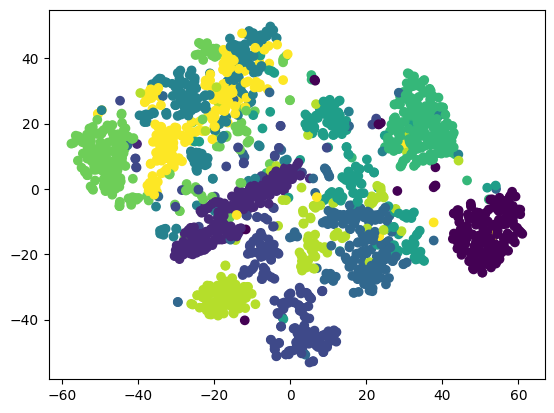

In [43]:
from matplotlib import pyplot as plt
import numpy as np

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y[:2_000].astype('int32'))
plt.show()

In [33]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X[:2_000], y[:2_000])

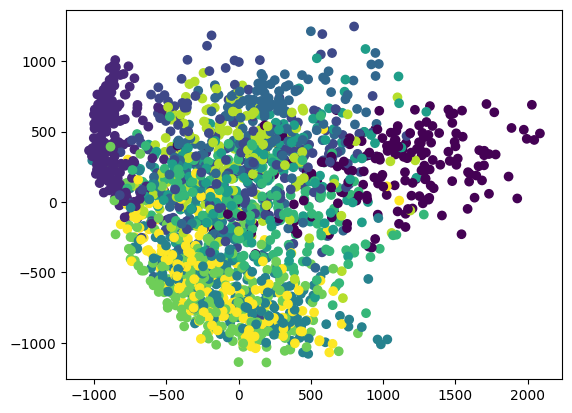

In [34]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y[:2_000].astype('int32'))
plt.show()

In [35]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)
X_reduced = lle.fit_transform(X[:2_000], y[:2_000])

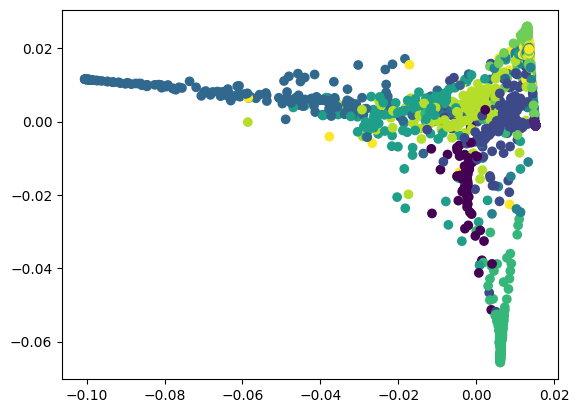

In [36]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y[:2_000].astype('int32'))
plt.show()

In [37]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
mds.fit_transform(X[:2_000], y[:2_000])

array([[ 1501.79606937,   519.39488457],
       [-2035.20869371,    30.96813021],
       [ -529.20499672,  1708.81152851],
       ...,
       [ 1993.44573747,  1279.49236716],
       [  841.64218815,  -405.15621791],
       [  481.88716124,  2929.19277045]])

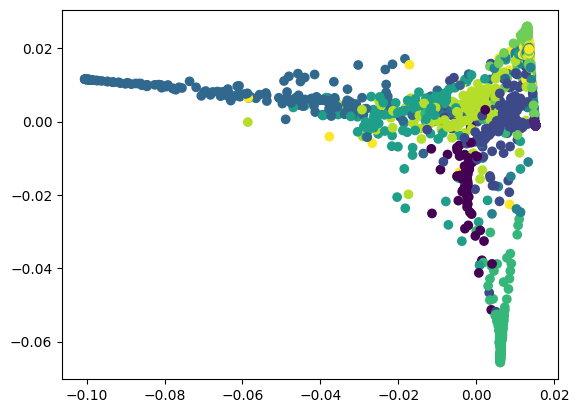

In [38]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y[:2_000].astype('int32'))
plt.show()

It looks the best in case of TSNE.